In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
instaData = pd.read_csv('ML_DataSets\instagram_reach.csv')
instaData = instaData.drop('Unnamed: 0',axis=1)
instaData.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [12]:
instaData.isnull().sum() #There are no null in the dataset.

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [15]:
pd.value_counts(instaData['Hashtags'].unique())

#MachineLearning #AI #DataAnalytics #DataScienc #DataLake                                                                                                                                                                                                                                                                                                     1
#rareplanet #shopatrareplanet #India#indiangood #kolkata  #calcutta#handpainted  #homedecor #gifts#terracotta #kettles #product #likesforfollow #like4like #instalike#like4likeback #likes4tags                                                                                                                                                               1
#bitcoinsuperstar #tonylocorriere#blockchain #hodl #hold #market #crypto#now #wallet #product                                                                                                                                                                                                           

In [18]:
instaData

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...
95,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [30]:
cleanedData = instaData.dropna(how='any') # droping the null rows if their is any

In [51]:

cleanedData = cleanedData.drop(['USERNAME'], axis=1)

In [72]:
cleanedData['hour'] = cleanedData['Time since posted'].str.split(' ')

In [ ]:
lst = []
for i,j in cleanedData['hour']:
    lst.append(i)
cleanedData['hour'] = lst

In [81]:
cleanedData = cleanedData.drop(['Time since posted'],axis=1)

In [62]:
enc = OrdinalEncoder()
cleanedData[['Caption','Hashtags']] = enc.fit_transform(cleanedData[['Caption','Hashtags']])

In [84]:
independent = cleanedData[['Caption','Followers','Hashtags','hour']]
target = cleanedData['Likes']

In [86]:
X_train, X_test,y_train, y_test = train_test_split(independent,target ,
                                   random_state=104, 
                                   test_size=0.30, 
                                   shuffle=True)

In [88]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [89]:
regression.coef_

array([2.60792668e-01, 5.70816051e-03, 4.05447016e-01, 1.07697562e+01])

In [90]:
regression.intercept_

-25.868334457393516

In [91]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [92]:
y_pred=regression.predict(X_test)

In [93]:
mae, rmse, r2_square=evaluate_model(y_test,y_pred)

In [94]:
mae

29.027747240733586

In [95]:
rmse

46.36202105356082

--------------------------------------------------------------------------------------------------

Q-2. Imagine you have a dataset where you have different features like Age ,

Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.

Dataset This is the Dataset You can use this dataset for this question.

In [2]:
Obesity = pd.read_csv("ML_DataSets\Obesity.csv")
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
Obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
Obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
Obesity['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [6]:
Obesity['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
Obesity['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [8]:
pd.value_counts(Obesity['CALC'])

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [9]:
Obesity['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [10]:
Obesity['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
Obesity['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
Obesity['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
Obesity['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
Obesity['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
CAEC = {'Sometimes':1, 'Frequently':2, 'Always':3, 'no':4}
SMOKE = {'no':0, 'yes':1}
CALC = {'Sometimes':1, 'Frequently':2, 'Always':3, 'no':4}
MTRANS = {'Public_Transportation':1, 'Walking':2, 'Automobile':3, 'Motorbike':4,'Bike':5}
NObeyesdad = {'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3,'Obesity_Type_I':4, 'Insufficient_Weight':5, 'Obesity_Type_II':6,
       'Obesity_Type_III':7}
Gender = {'Female':0, 'Male':1}
family_history_with_overweight = {'yes':1, 'no':0}
FAVC = {'no':0, 'yes':1}
SCC = {'no':0, 'yes':1}


In [16]:
Obesity['CAEC'] = Obesity['CAEC'].replace(CAEC)
Obesity['SMOKE'] = Obesity['SMOKE'].replace(SMOKE)
Obesity['CALC'] = Obesity['CALC'].replace(CALC)
Obesity['MTRANS'] = Obesity['MTRANS'].replace(MTRANS)
Obesity['NObeyesdad'] = Obesity['NObeyesdad'].replace(NObeyesdad)
Obesity['Gender'] = Obesity['Gender'].replace(Gender)
Obesity['family_history_with_overweight'] = Obesity['family_history_with_overweight'].replace(family_history_with_overweight)
Obesity['FAVC'] = Obesity['FAVC'].replace(FAVC)
Obesity['SCC'] = Obesity['SCC'].replace(SCC)

In [17]:
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,4,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


In [29]:
# Obesity.to_csv('cleanedObesity.csv')

In [18]:
independentVar = Obesity.drop('NObeyesdad',axis=1)
target = Obesity['NObeyesdad']

In [19]:
X_train, X_test,y_train, y_test = train_test_split(independentVar,target ,random_state=32, test_size=0.30, shuffle=True)

In [20]:
model=DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9416403785488959

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}


In [26]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [27]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [28]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=4)

In [29]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [30]:
model_2=DecisionTreeClassifier(max_depth=3,min_samples_leaf=3,min_samples_split=2)

In [31]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [32]:
y_pred=model_2.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.6340694006309149

[Text(0.5, 0.875, 'x[3] <= 100.088\ngini = 0.857\nsamples = 1477\nvalue = [202, 215, 196, 232, 195, 211, 226]'),
 Text(0.25, 0.625, 'x[3] <= 60.059\ngini = 0.801\nsamples = 977\nvalue = [202, 215, 194, 165, 195, 6, 0]'),
 Text(0.125, 0.375, 'x[2] <= 1.66\ngini = 0.482\nsamples = 299\nvalue = [101, 7, 1, 0, 190, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.534\nsamples = 156\nvalue = [87, 7, 1, 0, 61, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.177\nsamples = 143\nvalue = [14, 0, 0, 0, 129, 0, 0]'),
 Text(0.375, 0.375, 'x[3] <= 76.041\ngini = 0.743\nsamples = 678\nvalue = [101, 208, 193, 165, 5, 6, 0]'),
 Text(0.3125, 0.125, 'gini = 0.611\nsamples = 253\nvalue = [88, 127, 32, 1, 5, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.67\nsamples = 425\nvalue = [13, 81, 161, 164, 0, 6, 0]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\ngini = 0.61\nsamples = 500\nvalue = [0, 0, 2, 67, 0, 205, 226]'),
 Text(0.625, 0.375, 'x[10] <= 1.022\ngini = 0.009\nsamples = 226\nvalue = [0, 0, 0, 0, 0, 1, 225]'),
 Text(0.5625, 0.125, 

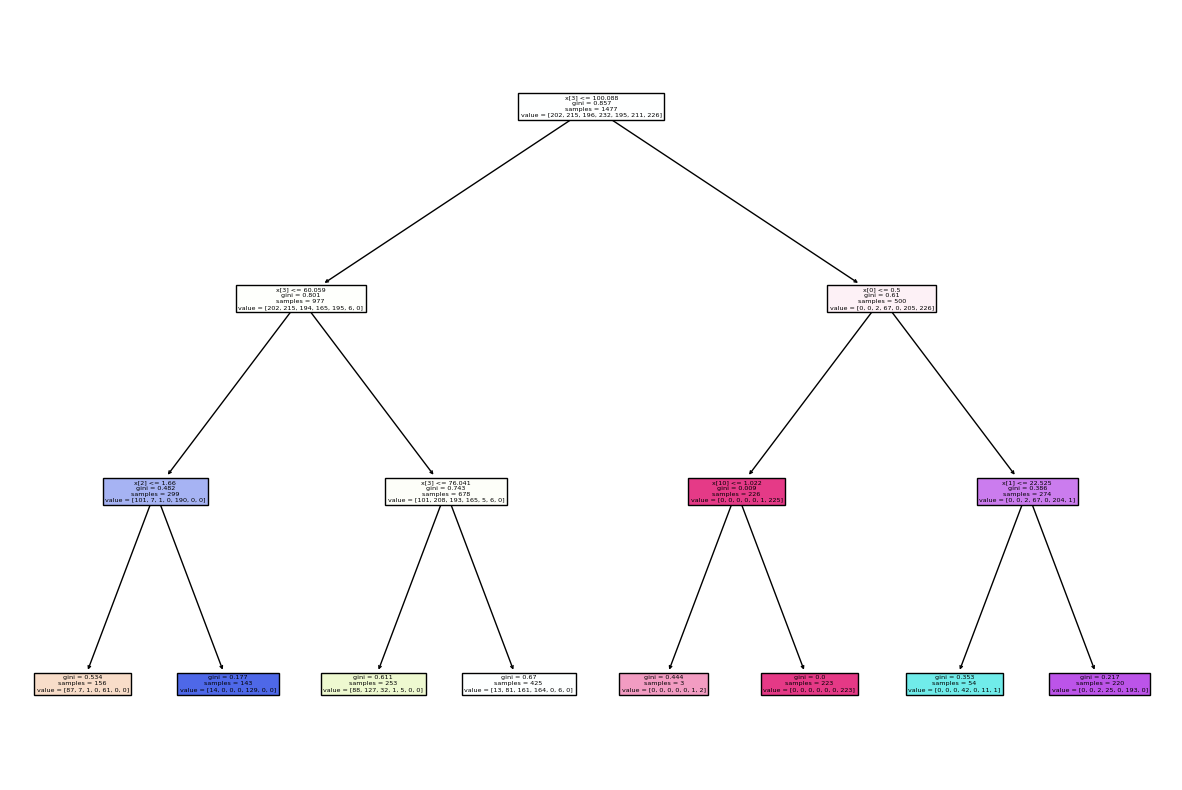

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_2,filled=True)